# Лабораторная работа №5
Баранов Д.А. ИВТ 2.1

Задание 1: Прогнозирование временных рядов
(SimpleRNN, LSTM и Bidirectional LSTM)

1. Загрузка и предобработка данных

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
import math

In [12]:
# Загрузка данных
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                       usecols = [1], engine = 'python', skipfooter = 3)
data = dataset.values.astype('float32')

# Нормализация данных
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(data)

# Разделение на обучающую и тестовую выборки
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(f"Размер обучающей выборки: {len(train)}, размер тестовой выборки: {len(test)}")

# Функция для создания датасета с временными шагами
def create_dataset(dataset, look_back = 1):
  X, Y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:(i + look_back), 0])
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

# Создание датасетов с временными шагами
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Преобразование входных данных для RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Размер обучающей выборки: 94, размер тестовой выборки: 47


2. Создание и обучение модели SimpleRNN

In [14]:
# Создание модели SimpleRNN
def create_simple_rnn_model():
  model = Sequential()
  model.add(SimpleRNN(units = 50, activation = 'relu', input_shape = (look_back, 1)))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

# Обучение модели SimpleRNN
simple_rnn_model = create_simple_rnn_model()
simple_rnn_history = simple_rnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32,
                                          validation_data = (X_test, y_test), verbose = 2)

# Прогнозирование
simple_rnn_train_predict = simple_rnn_model.predict(X_train)
simple_rnn_test_predict = simple_rnn_model.predict(X_test)

# Обратное преобразование прогнозов
simple_rnn_train_predict = scaler.inverse_transform(simple_rnn_train_predict)
simple_rnn_test_predict = scaler.inverse_transform(simple_rnn_test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])

# Расчет RMSE
simple_rnn_train_rmse = math.sqrt(mean_squared_error(y_train_inv[0],
  simple_rnn_train_predict[:, 0]))
simple_rnn_test_rmse = math.sqrt(mean_squared_error(y_test_inv[0],
  simple_rnn_test_predict[:, 0]))
print(f'SimpleRNN - Ошибка на обучающей выборке (RMSE): {simple_rnn_train_rmse}')
print(f'SimpleRNN - Ошибка на тестовой выборке (RMSE): {simple_rnn_test_rmse}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 - 2s - 734ms/step - loss: 0.0474 - val_loss: 0.2440
Epoch 2/100
3/3 - 0s - 77ms/step - loss: 0.0344 - val_loss: 0.1878
Epoch 3/100
3/3 - 0s - 31ms/step - loss: 0.0228 - val_loss: 0.1329
Epoch 4/100
3/3 - 0s - 48ms/step - loss: 0.0131 - val_loss: 0.0817
Epoch 5/100
3/3 - 0s - 32ms/step - loss: 0.0077 - val_loss: 0.0447
Epoch 6/100
3/3 - 0s - 48ms/step - loss: 0.0060 - val_loss: 0.0258
Epoch 7/100
3/3 - 0s - 35ms/step - loss: 0.0064 - val_loss: 0.0191
Epoch 8/100
3/3 - 0s - 32ms/step - loss: 0.0063 - val_loss: 0.0179
Epoch 9/100
3/3 - 0s - 60ms/step - loss: 0.0052 - val_loss: 0.0194
Epoch 10/100
3/3 - 0s - 32ms/step - loss: 0.0040 - val_loss: 0.0236
Epoch 11/100
3/3 - 0s - 48ms/step - loss: 0.0035 - val_loss: 0.0284
Epoch 12/100
3/3 - 0s - 32ms/step - loss: 0.0035 - val_loss: 0.0304
Epoch 13/100
3/3 - 0s - 59ms/step - loss: 0.0035 - val_loss: 0.0279
Epoch 14/100
3/3 - 0s - 31ms/step - loss: 0.0033 - val_loss: 0.0234
Epoch 15/100
3/3 - 0s - 37ms/step - loss: 0.0030 - val_l

3. Создание и обучение модели LSTM

In [15]:
# Создание модели LSTM
def create_lstm_model():
  model = Sequential()
  model.add(LSTM(units = 50, activation = 'relu', input_shape = (look_back, 1)))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

# Обучение модели LSTM
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(X_train, y_train, epochs = 100, batch_size = 32,
                              validation_data = (X_test, y_test), verbose = 2)

# Прогнозирование
lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

# Обратное преобразование прогнозов
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

# Расчет RMSE
lstm_train_rmse = math.sqrt(mean_squared_error(y_train_inv[0], lstm_train_predict[:,0]))
lstm_test_rmse = math.sqrt(mean_squared_error(y_test_inv[0], lstm_test_predict[:,0]))
print(f'LSTM - Ошибка на обучающей выборке (RMSE): {lstm_train_rmse}')
print(f'LSTM - Ошибка на тестовой выборке (RMSE): {lstm_test_rmse}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 3s - 835ms/step - loss: 0.0523 - val_loss: 0.2963
Epoch 2/100
3/3 - 0s - 110ms/step - loss: 0.0468 - val_loss: 0.2750
Epoch 3/100
3/3 - 0s - 34ms/step - loss: 0.0416 - val_loss: 0.2554
Epoch 4/100
3/3 - 0s - 38ms/step - loss: 0.0372 - val_loss: 0.2364
Epoch 5/100
3/3 - 0s - 36ms/step - loss: 0.0329 - val_loss: 0.2178
Epoch 6/100
3/3 - 0s - 47ms/step - loss: 0.0287 - val_loss: 0.1998
Epoch 7/100
3/3 - 0s - 47ms/step - loss: 0.0250 - val_loss: 0.1823
Epoch 8/100
3/3 - 0s - 44ms/step - loss: 0.0218 - val_loss: 0.1651
Epoch 9/100
3/3 - 0s - 48ms/step - loss: 0.0187 - val_loss: 0.1484
Epoch 10/100
3/3 - 0s - 34ms/step - loss: 0.0159 - val_loss: 0.1324
Epoch 11/100
3/3 - 0s - 35ms/step - loss: 0.0134 - val_loss: 0.1173
Epoch 12/100
3/3 - 0s - 46ms/step - loss: 0.0120 - val_loss: 0.1026
Epoch 13/100
3/3 - 0s - 35ms/step - loss: 0.0106 - val_loss: 0.0895
Epoch 14/100
3/3 - 0s - 33ms/step - loss: 0.0095 - val_loss: 0.0789
Epoch 15/100
3/3 - 0s - 45ms/step - loss: 0.0091 - val_loss: 0.0700

4. Создание и обучение модели Bidirectional LSTM

In [16]:
# Создание модели Bidirectional LSTM
def create_bidirectional_lstm_model():
  model = Sequential()
  model.add(Bidirectional(LSTM(units = 50, activation = 'relu'), input_shape = (look_back, 1)))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

# Обучение модели Bidirectional LSTM
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_history = bidirectional_lstm_model.fit(X_train, y_train, epochs = 100,
                                                          batch_size = 32, validation_data = (X_test, y_test),
                                                          verbose = 2)

# Прогнозирование
bidirectional_lstm_train_predict = bidirectional_lstm_model.predict(X_train)
bidirectional_lstm_test_predict = bidirectional_lstm_model.predict(X_test)

# Обратное преобразование прогнозов
bidirectional_lstm_train_predict = scaler.inverse_transform(bidirectional_lstm_train_predict)
bidirectional_lstm_test_predict = scaler.inverse_transform(bidirectional_lstm_test_predict)

# Расчет RMSE
bidirectional_lstm_train_rmse = math.sqrt(mean_squared_error(y_train_inv[0],
                                                             bidirectional_lstm_train_predict[:,0]))
bidirectional_lstm_test_rmse = math.sqrt(mean_squared_error(y_test_inv[0],
                                                            bidirectional_lstm_test_predict[:,0]))

print(f'Bidirectional LSTM - Ошибка на обучающей выборке (RMSE): {bidirectional_lstm_train_rmse}')
print(f'Bidirectional LSTM - Ошибка на тестовой выборке (RMSE): {bidirectional_lstm_test_rmse}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 4s - 1s/step - loss: 0.0527 - val_loss: 0.2943
Epoch 2/100
3/3 - 0s - 57ms/step - loss: 0.0450 - val_loss: 0.2650
Epoch 3/100
3/3 - 0s - 37ms/step - loss: 0.0385 - val_loss: 0.2372
Epoch 4/100
3/3 - 0s - 37ms/step - loss: 0.0327 - val_loss: 0.2110
Epoch 5/100
3/3 - 0s - 48ms/step - loss: 0.0271 - val_loss: 0.1864
Epoch 6/100
3/3 - 0s - 37ms/step - loss: 0.0224 - val_loss: 0.1628
Epoch 7/100
3/3 - 0s - 46ms/step - loss: 0.0182 - val_loss: 0.1404
Epoch 8/100
3/3 - 0s - 39ms/step - loss: 0.0147 - val_loss: 0.1196
Epoch 9/100
3/3 - 0s - 41ms/step - loss: 0.0118 - val_loss: 0.1007
Epoch 10/100
3/3 - 0s - 38ms/step - loss: 0.0102 - val_loss: 0.0836
Epoch 11/100
3/3 - 0s - 47ms/step - loss: 0.0088 - val_loss: 0.0699
Epoch 12/100
3/3 - 0s - 45ms/step - loss: 0.0086 - val_loss: 0.0589
Epoch 13/100
3/3 - 0s - 46ms/step - loss: 0.0083 - val_loss: 0.0520
Epoch 14/100
3/3 - 0s - 49ms/step - loss: 0.0082 - val_loss: 0.0481
Epoch 15/100
3/3 - 0s - 49ms/step - loss: 0.0080 - val_loss: 0.0460
Epo

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Bidirectional LSTM - Ошибка на обучающей выборке (RMSE): 27.7031470265828
Bidirectional LSTM - Ошибка на тестовой выборке (RMSE): 67.0078636748505


5. Визуализация результатов

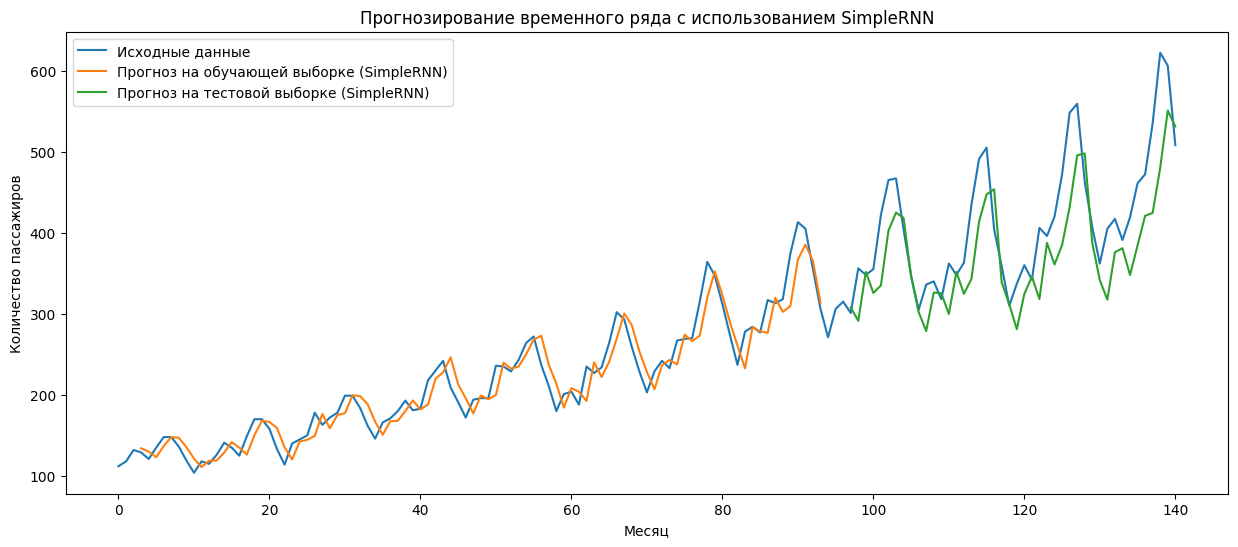

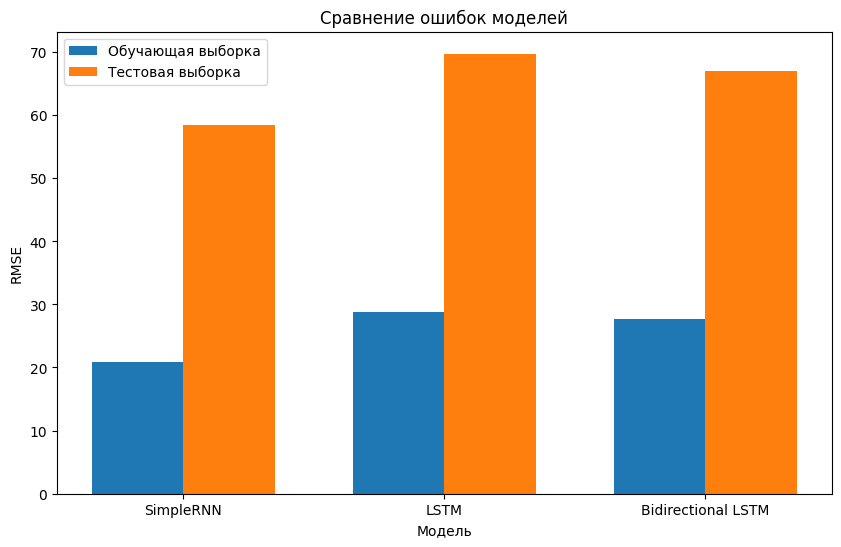

In [17]:
# Подготовка данных для визуализации
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[look_back:len(simple_rnn_train_predict) + look_back, :] = simple_rnn_train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(simple_rnn_train_predict) + (look_back * 2):len(data), :] = simple_rnn_test_predict

# Визуализация результатов SimpleRNN
plt.figure(figsize = (15, 6))
plt.plot(scaler.inverse_transform(data), label = 'Исходные данные')
plt.plot(train_plot, label = 'Прогноз на обучающей выборке (SimpleRNN)')
plt.plot(test_plot, label = 'Прогноз на тестовой выборке (SimpleRNN)')
plt.title('Прогнозирование временного ряда с использованием SimpleRNN')
plt.xlabel('Месяц')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Сравнение ошибок модели
models = ['SimpleRNN', 'LSTM', 'Bidirectional LSTM']
train_rmse = [simple_rnn_train_rmse, lstm_train_rmse, bidirectional_lstm_train_rmse]
test_rmse = [simple_rnn_test_rmse, lstm_test_rmse, bidirectional_lstm_test_rmse]

plt.figure(figsize = (10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_rmse, width, label = 'Обучающая выборка')
plt.bar(x + width/2, test_rmse, width, label = 'Тестовая выборка')

plt.xlabel('Модель')
plt.ylabel('RMSE')
plt.title('Сравнение ошибок моделей')
plt.xticks(x, models)
plt.legend()
plt.show()